In [1]:
# Importing Necessary Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime

# Import the Financial Modeling Prep API key
from api_keys import financial_api_key

# Setting Up API Request

In [2]:
# Setting Up APIs To Obtain Rivian's Balance Sheet Data, Income Statement Data, And Statement Of Cash Flows For Last 4 Years
rivian_ticker = "RIVN"

# Request For Balance Sheet Data
balance_sheet_url = f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{rivian_ticker}?limit=120&apikey={financial_api_key}"
rivian_balance_sheet = requests.get(balance_sheet_url).json()

# Request For Income Statement Data
income_statement_url = f"https://financialmodelingprep.com/api/v3/income-statement/{rivian_ticker}?limit=120&apikey={financial_api_key}"
rivian_income_statement = requests.get(income_statement_url).json()


# Request for Cash Flow Statement Data
cash_flow_statement_url = f"https://financialmodelingprep.com/api/v3/cash-flow-statement/{rivian_ticker}?limit=120&apikey={financial_api_key}"
rivian_cash_flow_statement = requests.get(cash_flow_statement_url).json()

# Rivian's Balance Sheet

In [3]:
# Cleaning Rivian's Balance Sheets Data In Pandas DataFrame
pd.set_option('display.max_columns', None)
rivian_balance_sheet_df = pd.DataFrame(rivian_balance_sheet)

# Dropping All Unnecessary Columns
rivian_balance_sheet_df = rivian_balance_sheet_df.drop(columns = ["date", "symbol", "reportedCurrency",
                                                                  "cik", "fillingDate", "acceptedDate",
                                                                  "period", "cashAndShortTermInvestments","goodwillAndIntangibleAssets",
                                                                  "totalEquity", "minorityInterest", "totalLiabilitiesAndTotalEquity",
                                                                  "totalInvestments", "link", "finalLink",
                                                                  "otherAssets"])

# Renaming All Columns
rivian_balance_sheet_df = rivian_balance_sheet_df.rename(columns = {"calendarYear" : "Year",
                                                                    "cashAndCashEquivalents" : "Cash/Cash-Equivalents",
                                                                    "shortTermInvestments" : "Short-Term Investments",
                                                                    "netReceivables" : "Account Receivables",
                                                                    "inventory" : "Inventory",
                                                                    "otherCurrentAssets" : "Other Current Assets",
                                                                    "totalCurrentAssets" : "Total Current Assets",
                                                                    "propertyPlantEquipmentNet" : "Property Plant & Equipment (PPE)",
                                                                    "goodwill" : "Goodwill",
                                                                    "intangibleAssets" : "Intangible Assets",
                                                                    "longTermInvestments" : "Long-Term Investments",
                                                                    "taxAssets" : "Tax Assets",
                                                                    "otherNonCurrentAssets" : "Other Non-Current Assets",
                                                                    "totalNonCurrentAssets" : "Total Non-Current Assets",
                                                                    "otherAssets" : "Other Assets",
                                                                    "totalAssets" : "Total Assets",
                                                                    "accountPayables" : "Account Payables",
                                                                    "shortTermDebt" : "Short-Term Debt",
                                                                    "taxPayables" : "Tax Payables",
                                                                    "deferredRevenue" : "Deferred Revenue",
                                                                    "otherCurrentLiabilities" : "Other Current Liabilities",
                                                                    "totalCurrentLiabilities" : "Total Current Liabilities",
                                                                    "longTermDebt" : "Long-Term Debt",
                                                                    "deferredRevenueNonCurrent" : "Deferred Revenue Non-Current",
                                                                    "deferredTaxLiabilitiesNonCurrent" : "Deferred Tax Liabilities Non-Current",
                                                                    "otherNonCurrentLiabilities" : "Other Non-Current Liabilities",
                                                                    "totalNonCurrentLiabilities" : "Total Non-Current Liabilities",
                                                                    "otherLiabilities" : "Other Liabilities",
                                                                    "capitalLeaseObligations" : "Capital Lease Obligations",
                                                                    "totalLiabilities" : "Total Liabilities",
                                                                    "preferredStock" : "Preferred Stock",
                                                                    "commonStock" : "Common Stock",
                                                                    "retainedEarnings" : "Retained Earnings",
                                                                    "accumulatedOtherComprehensiveIncomeLoss" : "Accumulated Other Comprehensive Income Loss",
                                                                    "othertotalStockholdersEquity" : "Other Stockholders' Equity",
                                                                    "totalStockholdersEquity" : "Total Stockholders' Equity",
                                                                    "totalLiabilitiesAndStockholdersEquity" : "Total Liabilities & Stockholders' Equity",
                                                                    "totalDebt" : "Total Debt",
                                                                    "netDebt" : "Net Debt"})

# Setting DataFrame Index to "Year"
rivian_balance_sheet_df = rivian_balance_sheet_df.set_index("Year")

# Formatting Numbers To Currency Format For $USD
rivian_balance_sheet_df_currency_styled = rivian_balance_sheet_df.style.format("{0:,.2f} ($)")

# Displaying Cleaned Balance Sheet For Rivian's Last 4 Years
rivian_balance_sheet_df_currency_styled

,Cash/Cash-Equivalents,Short-Term Investments,Account Receivables,Inventory,Other Current Assets,Total Current Assets,Property Plant & Equipment (PPE),Goodwill,Intangible Assets,Long-Term Investments,Tax Assets,Other Non-Current Assets,Total Non-Current Assets,Total Assets,Account Payables,Short-Term Debt,Tax Payables,Deferred Revenue,Other Current Liabilities,Total Current Liabilities,Long-Term Debt,Deferred Revenue Non-Current,Deferred Tax Liabilities Non-Current,Other Non-Current Liabilities,Total Non-Current Liabilities,Other Liabilities,Capital Lease Obligations,Total Liabilities,Preferred Stock,Common Stock,Retained Earnings,Accumulated Other Comprehensive Income Loss,Other Stockholders' Equity,Total Stockholders' Equity,Total Liabilities & Stockholders' Equity,Total Debt,Net Debt
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022,"11,568,000,000.00 ($)",0.00 ($),"102,000,000.00 ($)","1,348,000,000.00 ($)","112,000,000.00 ($)","13,130,000,000.00 ($)","4,418,000,000.00 ($)",0.00 ($),0.00 ($),0.00 ($),0.00 ($),"328,000,000.00 ($)","4,746,000,000.00 ($)","17,876,000,000.00 ($)","1,000,000,000.00 ($)","1,028,000,000.00 ($)",0.00 ($),0.00 ($),"396,000,000.00 ($)","2,424,000,000.00 ($)","1,542,000,000.00 ($)",0.00 ($),0.00 ($),"111,000,000.00 ($)","1,653,000,000.00 ($)",0.00 ($),"1,339,000,000.00 ($)","4,077,000,000.00 ($)",0.00 ($),"1,000,000.00 ($)","-13,126,000,000.00 ($)","-2,000,000.00 ($)","26,926,000,000.00 ($)","13,799,000,000.00 ($)","17,876,000,000.00 ($)","2,570,000,000.00 ($)","-8,998,000,000.00 ($)"
2021,"18,133,000,000.00 ($)",0.00 ($),"26,000,000.00 ($)","274,000,000.00 ($)","126,000,000.00 ($)","18,559,000,000.00 ($)","3,411,000,000.00 ($)",0.00 ($),0.00 ($),0.00 ($),0.00 ($),"324,000,000.00 ($)","3,735,000,000.00 ($)","22,294,000,000.00 ($)","483,000,000.00 ($)","89,000,000.00 ($)",0.00 ($),"74,000,000.00 ($)","667,000,000.00 ($)","1,313,000,000.00 ($)","1,444,000,000.00 ($)",0.00 ($),0.00 ($),"23,000,000.00 ($)","1,467,000,000.00 ($)",0.00 ($),"307,000,000.00 ($)","2,780,000,000.00 ($)",0.00 ($),"1,000,000.00 ($)","-6,374,000,000.00 ($)",0.00 ($),"25,887,000,000.00 ($)","19,514,000,000.00 ($)","22,294,000,000.00 ($)","1,533,000,000.00 ($)","-16,600,000,000.00 ($)"
2020,"2,979,000,000.00 ($)",0.00 ($),0.00 ($),0.00 ($),"37,000,000.00 ($)","3,016,000,000.00 ($)","1,525,000,000.00 ($)",0.00 ($),0.00 ($),0.00 ($),0.00 ($),"61,000,000.00 ($)","1,586,000,000.00 ($)","4,602,000,000.00 ($)","90,000,000.00 ($)","50,000,000.00 ($)",0.00 ($),"28,000,000.00 ($)","443,000,000.00 ($)","611,000,000.00 ($)","130,000,000.00 ($)",0.00 ($),0.00 ($),"5,245,000,000.00 ($)","5,375,000,000.00 ($)",0.00 ($),"105,000,000.00 ($)","5,986,000,000.00 ($)",0.00 ($),0.00 ($),"-1,686,000,000.00 ($)",0.00 ($),"302,000,000.00 ($)","-1,384,000,000.00 ($)","4,602,000,000.00 ($)","180,000,000.00 ($)","-2,799,000,000.00 ($)"
2019,"2,264,000,000.00 ($)",0.00 ($),0.00 ($),0.00 ($),"29,000,000.00 ($)","2,293,000,000.00 ($)","313,000,000.00 ($)",0.00 ($),0.00 ($),0.00 ($),0.00 ($),"27,000,000.00 ($)","340,000,000.00 ($)","2,633,000,000.00 ($)","27,000,000.00 ($)",0.00 ($),0.00 ($),"18,000,000.00 ($)","140,000,000.00 ($)","185,000,000.00 ($)","71,000,000.00 ($)",0.00 ($),0.00 ($),"2,752,000,000.00 ($)","2,823,000,000.00 ($)",0.00 ($),0.00 ($),"3,008,000,000.00 ($)",0.00 ($),0.00 ($),"-668,000,000.00 ($)",0.00 ($),"293,000,000.00 ($)","-375,000,000.00 ($)","2,633,000,000.00 ($)","71,000,000.00 ($)","-2,193,000,000.00 ($)"


# Rivian's Income Statement

In [4]:
# Cleaning Rivian's Income Statements Data In Pandas DataFrame
pd.set_option('display.max_columns', None)
rivian_income_statement_df = pd.DataFrame(rivian_income_statement)

# Dropping All Unnecessary Columns
rivian_income_statement_df = rivian_income_statement_df.drop(columns = ["date", "symbol", "reportedCurrency",
                                                                        "cik", "fillingDate", "acceptedDate",
                                                                        "period", "generalAndAdministrativeExpenses", "ebitdaratio", 
                                                                        "grossProfitRatio", "sellingAndMarketingExpenses", "operatingIncomeRatio", 
                                                                        "incomeBeforeTaxRatio", "netIncomeRatio", "link", 
                                                                        "finalLink"])

# Renaming all columns
rivian_income_statement_df = rivian_income_statement_df.rename(columns = {"calendarYear" : "Year",
                                                                          "revenue" : "Revenue",
                                                                          "costOfRevenue" : "Cost of Goods Sold",
                                                                          "grossProfit" : "Gross Profit",
                                                                          "researchAndDevelopmentExpenses" : "Research & Development Expenses",
                                                                          "sellingGeneralAndAdministrativeExpenses" : "Selling General & Administrative Expenses",
                                                                          "otherExpenses" : "Other Expenses",
                                                                          "operatingExpenses" : "Total Operating Expenses",
                                                                          "costAndExpenses" : "Total COGS & Expenses",
                                                                          "interestIncome" : "Interest Income",
                                                                          "interestExpense" : "Interest Expense",
                                                                          "depreciationAndAmortization" : "Depreciation & Amortization",
                                                                          "ebitda" : "Earnings Before Interest, Taxes, Depreciation, & Amortization (EBITDA)",
                                                                          "operatingIncome" : "Operating Income",
                                                                          "totalOtherIncomeExpensesNet" : "Total Other Income Expenses",
                                                                          "incomeBeforeTax" : "Income Before Tax",
                                                                          "incomeTaxExpense" : "Income Tax Expense",
                                                                          "netIncome" : "Net Income",
                                                                          "eps" : "Earnings Per Share",
                                                                          "epsdiluted" : "Earnings Per Share Diluted",
                                                                          "weightedAverageShsOut" : "Weighted Average Shares Outstanding",
                                                                          "weightedAverageShsOutDil" : "Weighted Average Shares Outstanding Diluted"})

# Setting DataFrame Index to "Year"
rivian_income_statement_df = rivian_income_statement_df.set_index("Year")

# Formatting Numbers To Currency Format For $USD
rivian_income_statement_df_currency_styled = rivian_income_statement_df.style.format("{0:,.2f} ($)")

# Displaying Cleaned Income Statement For Rivian's Last 4 Years
rivian_income_statement_df_currency_styled

,Revenue,Cost of Goods Sold,Gross Profit,Research & Development Expenses,Selling General & Administrative Expenses,Other Expenses,Total Operating Expenses,Total COGS & Expenses,Interest Income,Interest Expense,Depreciation & Amortization,"Earnings Before Interest, Taxes, Depreciation, & Amortization (EBITDA)",Operating Income,Total Other Income Expenses,Income Before Tax,Income Tax Expense,Net Income,Earnings Per Share,Earnings Per Share Diluted,Weighted Average Shares Outstanding,Weighted Average Shares Outstanding Diluted
Year,,,,,,,,,,,,,,,,,,,,,
2022,"1,658,000,000.00 ($)","4,781,000,000.00 ($)","-3,123,000,000.00 ($)","1,944,000,000.00 ($)","1,789,000,000.00 ($)",0.00 ($),"3,733,000,000.00 ($)","8,514,000,000.00 ($)","193,000,000.00 ($)","103,000,000.00 ($)","652,000,000.00 ($)","-5,993,000,000.00 ($)","-6,856,000,000.00 ($)","108,000,000.00 ($)","-6,748,000,000.00 ($)","4,000,000.00 ($)","-6,752,000,000.00 ($)",-7.40 ($),-7.40 ($),"913,000,000.00 ($)","913,000,000.00 ($)"
2021,"55,000,000.00 ($)","520,000,000.00 ($)","-465,000,000.00 ($)","1,850,000,000.00 ($)","1,242,000,000.00 ($)","663,000,000.00 ($)","3,755,000,000.00 ($)","4,275,000,000.00 ($)","3,000,000.00 ($)","29,000,000.00 ($)","197,000,000.00 ($)","-4,462,000,000.00 ($)","-4,220,000,000.00 ($)","-468,000,000.00 ($)","-4,688,000,000.00 ($)",0.00 ($),"-4,688,000,000.00 ($)",-6.48 ($),-6.48 ($),"723,000,000.00 ($)","723,000,000.00 ($)"
2020,0.00 ($),0.00 ($),0.00 ($),"766,000,000.00 ($)",0.00 ($),"255,000,000.00 ($)","1,021,000,000.00 ($)","1,021,000,000.00 ($)","10,000,000.00 ($)","8,000,000.00 ($)","29,000,000.00 ($)","-981,000,000.00 ($)","-1,021,000,000.00 ($)","3,000,000.00 ($)","-1,018,000,000.00 ($)",0.00 ($),"-1,018,000,000.00 ($)",-1.41 ($),-1.41 ($),"723,000,000.00 ($)","723,000,000.00 ($)"
2019,0.00 ($),0.00 ($),0.00 ($),"301,000,000.00 ($)",0.00 ($),"108,000,000.00 ($)","409,000,000.00 ($)","409,000,000.00 ($)","18,000,000.00 ($)","34,000,000.00 ($)","7,000,000.00 ($)","-385,000,000.00 ($)","-409,000,000.00 ($)","-17,000,000.00 ($)","-426,000,000.00 ($)",0.00 ($),"-426,000,000.00 ($)",-4.22 ($),-4.22 ($),"101,000,000.00 ($)","101,000,000.00 ($)"


# Rivian's Statement Of Cash Flows

In [5]:
# Cleaning Rivian's Cash Flow Statements Data In Pandas DataFrame
pd.set_option('display.max_columns', None)
rivian_cash_flow_statement_df = pd.DataFrame(rivian_cash_flow_statement)

# Dropping All Unnecessary Columns
rivian_cash_flow_statement_df = rivian_cash_flow_statement_df.drop(columns = ["date", "symbol", "reportedCurrency",
                                                                             "cik", "fillingDate", "acceptedDate",
                                                                             "period", "link", "finalLink"])

# Renaming All Columns
rivian_cash_flow_statement_df = rivian_cash_flow_statement_df.rename(columns = {"calendarYear" : "Year",
                                                                               "netIncome" : "Net Income",
                                                                                "depreciationAndAmortization" : "Depreciation & Amortization",
                                                                               "deferredIncomeTax" : "Deferred Income Tax",
                                                                                "stockBasedCompensation" : "Stock-Based Compensation",
                                                                               "changeInWorkingCapital" : "Change In Working Capital",
                                                                                "accountsReceivables" : "Accounts Receivable",
                                                                               "inventory" : "Inventory", 
                                                                                "accountsPayables" : "Account Payables",
                                                                                "otherWorkingCapital" : "Other Working Capital",
                                                                               "otherNonCashItems" : "Other Non-Cash Items",
                                                                               "netCashProvidedByOperatingActivities" : "Net Cash Flow From Operating Activities",
                                                                               "investmentsInPropertyPlantAndEquipment" : "Property Plant & Equipment Investments",
                                                                               "acquisitionsNet" : "Net Acquisitions",
                                                                               "purchasesOfInvestments" : "Invesment Purchases",
                                                                               "salesMaturitiesOfInvestments" : "Investment Maturities Sales",
                                                                               "otherInvestingActivites" : "Other Investing Activities",
                                                                               "netCashUsedForInvestingActivites" : "Net Cash Flow From Investing Activities",
                                                                               "debtRepayment" : "Debt Repayment",
                                                                               "commonStockIssued" : "Common Stock Issued",
                                                                               "commonStockRepurchased" : "Common Stock Repurchased",
                                                                               "dividendsPaid" : "Dividends Paid",
                                                                               "otherFinancingActivites" : "Other Financing Activities",
                                                                               "netCashUsedProvidedByFinancingActivities" : "Net Cash Flow From Financing Activities",
                                                                               "effectOfForexChangesOnCash" : "Effect Of Exchange Rate Changes On Cash",
                                                                               "netChangeInCash" : "Net Change In Cash",
                                                                               "cashAtEndOfPeriod" : "Cash At End Of Period",
                                                                               "cashAtBeginningOfPeriod" : "Cash At Beginning Of Period",
                                                                               "operatingCashFlow" : "Operating Cash Flow",
                                                                               "capitalExpenditure" : "Capital Expenditure",
                                                                               "freeCashFlow" : "Free Cash Flow"})

# Setting DataFrame Index to "Year"
rivian_cash_flow_statement_df = rivian_cash_flow_statement_df.set_index("Year")

# Formatting Numbers To Currency Format For $USD
rivian_cash_flow_statement_df_currency_styled = rivian_cash_flow_statement_df.style.format("{0:,.2f} ($)")

# Displaying Cleaned Cash Flow Statement For Rivian's Last 4 Years
rivian_cash_flow_statement_df_currency_styled

,Net Income,Depreciation & Amortization,Deferred Income Tax,Stock-Based Compensation,Change In Working Capital,Accounts Receivable,Inventory,Account Payables,Other Working Capital,Other Non-Cash Items,Net Cash Flow From Operating Activities,Property Plant & Equipment Investments,Net Acquisitions,Invesment Purchases,Investment Maturities Sales,Other Investing Activities,Net Cash Flow From Investing Activities,Debt Repayment,Common Stock Issued,Common Stock Repurchased,Dividends Paid,Other Financing Activities,Net Cash Flow From Financing Activities,Effect Of Exchange Rate Changes On Cash,Net Change In Cash,Cash At End Of Period,Cash At Beginning Of Period,Operating Cash Flow,Capital Expenditure,Free Cash Flow
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022,"-6,752,000,000.00 ($)","652,000,000.00 ($)",0.00 ($),"987,000,000.00 ($)","61,000,000.00 ($)","-76,000,000.00 ($)","-1,657,000,000.00 ($)",0.00 ($),0.00 ($),0.00 ($),"-5,052,000,000.00 ($)",0.00 ($),0.00 ($),0.00 ($),0.00 ($),"-1,369,000,000.00 ($)","-1,369,000,000.00 ($)",0.00 ($),0.00 ($),0.00 ($),0.00 ($),"99,000,000.00 ($)","99,000,000.00 ($)","-2,000,000.00 ($)","-6,324,000,000.00 ($)","12,099,000,000.00 ($)","18,423,000,000.00 ($)","-5,052,000,000.00 ($)","-1,369,000,000.00 ($)","-6,421,000,000.00 ($)"
2021,"-4,688,000,000.00 ($)","197,000,000.00 ($)",0.00 ($),"570,000,000.00 ($)","84,000,000.00 ($)","-20,000,000.00 ($)","-369,000,000.00 ($)",0.00 ($),"46,000,000.00 ($)","1,215,000,000.00 ($)","-2,622,000,000.00 ($)",0.00 ($),0.00 ($),0.00 ($),0.00 ($),"-1,794,000,000.00 ($)","-1,794,000,000.00 ($)","-86,000,000.00 ($)","16,188,000,000.00 ($)",0.00 ($),0.00 ($),"3,726,000,000.00 ($)","19,828,000,000.00 ($)",0.00 ($),"15,412,000,000.00 ($)","18,423,000,000.00 ($)","3,011,000,000.00 ($)","-2,622,000,000.00 ($)","-1,794,000,000.00 ($)","-4,416,000,000.00 ($)"
2020,"-1,018,000,000.00 ($)","29,000,000.00 ($)",0.00 ($),0.00 ($),"100,000,000.00 ($)",0.00 ($),0.00 ($),0.00 ($),"10,000,000.00 ($)","41,000,000.00 ($)","-848,000,000.00 ($)",0.00 ($),0.00 ($),0.00 ($),0.00 ($),"-914,000,000.00 ($)","-914,000,000.00 ($)",0.00 ($),"2,506,000,000.00 ($)","-6,000,000.00 ($)",0.00 ($),0.00 ($),"2,500,000,000.00 ($)",0.00 ($),"738,000,000.00 ($)","3,011,000,000.00 ($)","2,273,000,000.00 ($)","-848,000,000.00 ($)","-914,000,000.00 ($)","-1,762,000,000.00 ($)"
2019,"-426,000,000.00 ($)","7,000,000.00 ($)",0.00 ($),0.00 ($),"29,000,000.00 ($)",0.00 ($),0.00 ($),0.00 ($),"14,000,000.00 ($)","37,000,000.00 ($)","-353,000,000.00 ($)",0.00 ($),0.00 ($),0.00 ($),0.00 ($),"-199,000,000.00 ($)","-199,000,000.00 ($)",0.00 ($),"2,750,000,000.00 ($)",0.00 ($),0.00 ($),"61,000,000.00 ($)","2,811,000,000.00 ($)",0.00 ($),"2,259,000,000.00 ($)","2,273,000,000.00 ($)","14,000,000.00 ($)","-353,000,000.00 ($)","-197,000,000.00 ($)","-550,000,000.00 ($)"


# Liquidity Ratios

In [6]:
### Liquidity Ratios

# Current Ratio = Current Assets / Current Liabilities
current_ratio_2019 = rivian_balance_sheet_df.iloc[3, 5] / rivian_balance_sheet_df.iloc[3, 19]
current_ratio_2020 = rivian_balance_sheet_df.iloc[2, 5] / rivian_balance_sheet_df.iloc[2, 19]
current_ratio_2021 = rivian_balance_sheet_df.iloc[1, 5] / rivian_balance_sheet_df.iloc[1, 19]
current_ratio_2022 = rivian_balance_sheet_df.iloc[0, 5] / rivian_balance_sheet_df.iloc[0, 19]

# Operating Cash Flow Ratio = Net Operating Cash Flow / Current Liabilities
operating_cash_flow_ratio_2019 = rivian_cash_flow_statement_df.iloc[3, 10] / rivian_balance_sheet_df.iloc[3, 19]
operating_cash_flow_ratio_2020 = rivian_cash_flow_statement_df.iloc[2, 10] / rivian_balance_sheet_df.iloc[2, 19]
operating_cash_flow_ratio_2021 = rivian_cash_flow_statement_df.iloc[1, 10] / rivian_balance_sheet_df.iloc[1, 19]
operating_cash_flow_ratio_2022 = rivian_cash_flow_statement_df.iloc[0, 10] / rivian_balance_sheet_df.iloc[0, 19]

# Setting Up Plot For Current Ratios & Operating Cash Flow Ratios With Respective Year
x_plots_years = ["2019", "2020", "2021", "2022"]

y_plots_current_ratios = [current_ratio_2019, 
                          current_ratio_2020, 
                          current_ratio_2021, 
                          current_ratio_2022]

y_plots_operating_cash_flow_ratios = [operating_cash_flow_ratio_2019, 
                                      operating_cash_flow_ratio_2020, 
                                      operating_cash_flow_ratio_2021,
                                      operating_cash_flow_ratio_2022]

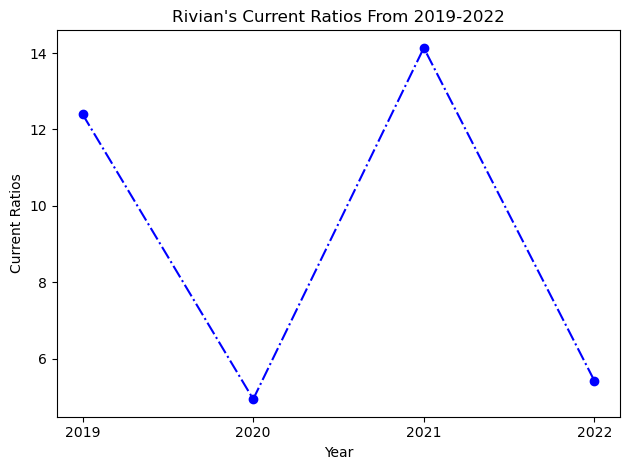

In [7]:
# Plotting Rivian's Current Ratios From 2019-2022 & Saving Plot
plt.plot(x_plots_years, y_plots_current_ratios, "o-.b")
plt.title("Rivian's Current Ratios From 2019-2022")
plt.xlabel("Year")
plt.ylabel("Current Ratios")
plt.savefig("../Financial Data Plots/CurrentRatios.png")
plt.tight_layout()
plt.show()

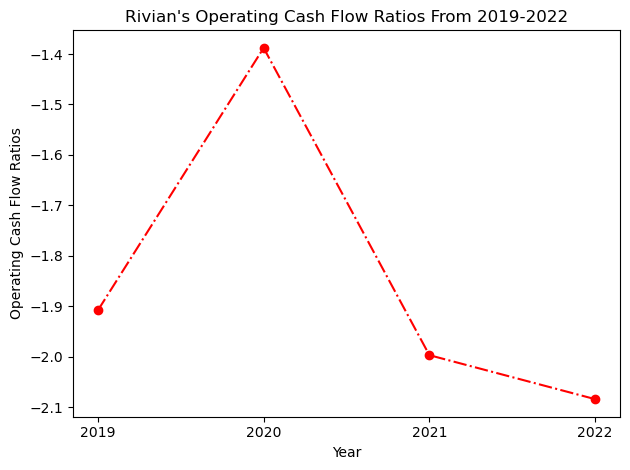

In [8]:
# Plotting Rivian's Operating Cash Flow Ratios From 2019-2022 & Saving Plot
plt.plot(x_plots_years, y_plots_operating_cash_flow_ratios, "o-.r")
plt.title("Rivian's Operating Cash Flow Ratios From 2019-2022")
plt.xlabel("Year")
plt.ylabel("Operating Cash Flow Ratios")
plt.savefig("../Financial Data Plots/OperatingCashFlowRatios.png")
plt.tight_layout()
plt.show()

# Leverage Financial Ratios

In [9]:
### Leverage Financial Ratios

# Debt Ratio = Total Liabilities / Total Assets
debt_ratio_2019 = rivian_balance_sheet_df.iloc[3, 27] / rivian_balance_sheet_df.iloc[3, 13]
debt_ratio_2020 = rivian_balance_sheet_df.iloc[2, 27] / rivian_balance_sheet_df.iloc[2, 13]
debt_ratio_2021 = rivian_balance_sheet_df.iloc[1, 27] / rivian_balance_sheet_df.iloc[1, 13]
debt_ratio_2022 = rivian_balance_sheet_df.iloc[0, 27] / rivian_balance_sheet_df.iloc[0, 13]

# Debt Service Coverage Ratio = Operating Income / Total Debt
debt_service_coverage_ratio_2019 = rivian_income_statement_df.iloc[3, 12] / rivian_balance_sheet_df.iloc[3, 35]
debt_service_coverage_ratio_2020 = rivian_income_statement_df.iloc[2, 12] / rivian_balance_sheet_df.iloc[2, 35]
debt_service_coverage_ratio_2021 = rivian_income_statement_df.iloc[1, 12] / rivian_balance_sheet_df.iloc[1, 35]
debt_service_coverage_ratio_2022 = rivian_income_statement_df.iloc[0, 12] / rivian_balance_sheet_df.iloc[0, 35]

# Setting Up Plot For Debt Ratios & Debt Service Coverage Ratios With Respective Year
x_plots_years = ["2019", "2020", "2021", "2022"]

y_plots_debt_ratios = [debt_ratio_2019, 
                       debt_ratio_2020, 
                       debt_ratio_2021, 
                       debt_ratio_2022]

y_plots_debt_service_coverage_ratios = [debt_service_coverage_ratio_2019, 
                                        debt_service_coverage_ratio_2020, 
                                        debt_service_coverage_ratio_2021, 
                                        debt_service_coverage_ratio_2022]

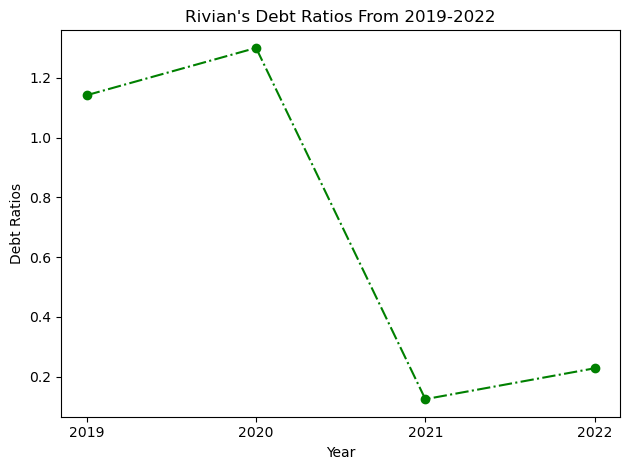

In [10]:
# Plotting Rivian's Debt Ratios From 2019-2022 & Saving Plot
plt.plot(x_plots_years, y_plots_debt_ratios, "o-.g")
plt.title("Rivian's Debt Ratios From 2019-2022")
plt.xlabel("Year")
plt.ylabel("Debt Ratios")
plt.savefig("../Financial Data Plots/DebtRatios.png")
plt.tight_layout()
plt.show()

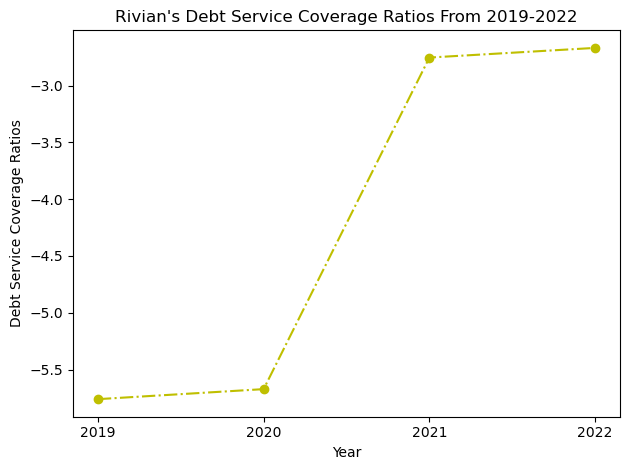

In [11]:
# Plotting Rivian's Debt Service Coverage Ratios From 2019-2022 & Saving Plot
plt.plot(x_plots_years, y_plots_debt_service_coverage_ratios, "o-.y")
plt.title("Rivian's Debt Service Coverage Ratios From 2019-2022")
plt.xlabel("Year")
plt.ylabel("Debt Service Coverage Ratios")
plt.savefig("../Financial Data Plots/DebtServiceCoverageRatios.png")
plt.tight_layout()
plt.show()

# Efficiency Ratios

In [12]:
### Efficiency Ratios

# Asset Turnover Ratio = Revenue / Average Total Assets 
## Average Total Assets = (Total Assets Current Year + Total Assets Previous Year) / 2 
average_total_assets_2020 = (rivian_balance_sheet_df.iloc[2, 13] + rivian_balance_sheet_df.iloc[3, 13]) / 2
asset_turnover_ratio_2020 = rivian_income_statement_df.iloc[2, 0] / average_total_assets_2020

average_total_assets_2021 = (rivian_balance_sheet_df.iloc[1, 13] + rivian_balance_sheet_df.iloc[2, 13]) / 2
asset_turnover_ratio_2021 = rivian_income_statement_df.iloc[1, 0] / average_total_assets_2021

average_total_assets_2022 = (rivian_balance_sheet_df.iloc[0, 13] + rivian_balance_sheet_df.iloc[1, 13]) / 2
asset_turnover_ratio_2022 = rivian_income_statement_df.iloc[0, 0] / average_total_assets_2022

# Inventory Turnover Ratio = Cost Of Goods Sold / Average Inventory
## Average Inventory = (Beginning Inventory Current Year + Ending Inventory Previous Year) / 2 
average_inventory_2020 = (rivian_balance_sheet_df.iloc[2, 3] + rivian_balance_sheet_df.iloc[3, 3]) / 2
average_inventory_2021 = (rivian_balance_sheet_df.iloc[1, 3] + rivian_balance_sheet_df.iloc[2, 3]) / 2
average_inventory_2022 = (rivian_balance_sheet_df.iloc[0, 3] + rivian_balance_sheet_df.iloc[1, 3]) / 2

if average_inventory_2020 != 0:
    inventory_turnover_ratio_2020 = rivian_income_statement_df.iloc[2, 1] / average_inventory_2020
else:
    inventory_turnover_ratio_2020 = 0
    
if average_inventory_2021 != 0:
    inventory_turnover_ratio_2021 = rivian_income_statement_df.iloc[1, 1] / average_inventory_2021
else:
    inventory_turnover_ratio_2021 = 0

if average_inventory_2022 != 0:
    inventory_turnover_ratio_2022 = rivian_income_statement_df.iloc[0, 1] / average_inventory_2022
else:
    inventory_turnover_ratio_2022 = 0
    
# Setting Up Plot For Asset Turnover Ratios & Inventory Turnover Ratios With Respective Year
x_plots_years = ["2020", "2021", "2022"]

y_plots_asset_turnover_ratios = [asset_turnover_ratio_2020,
                                 asset_turnover_ratio_2021,
                                 asset_turnover_ratio_2022]

y_plots_inventory_turnover_ratios = [inventory_turnover_ratio_2020, 
                                     inventory_turnover_ratio_2021, 
                                     inventory_turnover_ratio_2022]

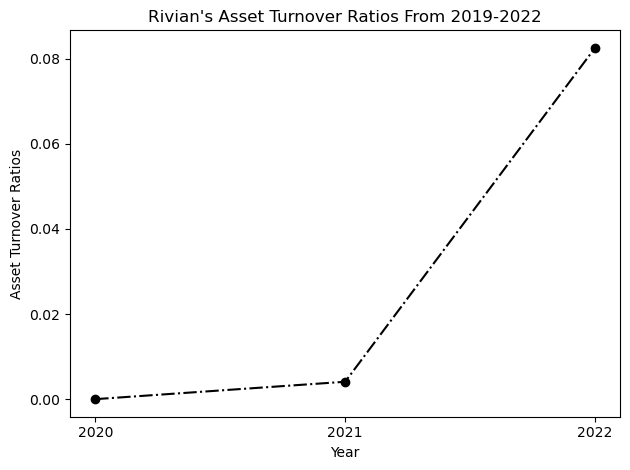

In [13]:
# Plotting Rivian's Asset Turnover Ratios From 2019-2022 & Saving Plot
plt.plot(x_plots_years, y_plots_asset_turnover_ratios, "o-.k")
plt.title("Rivian's Asset Turnover Ratios From 2019-2022")
plt.xlabel("Year")
plt.ylabel("Asset Turnover Ratios")
plt.savefig("../Financial Data Plots/AssetTurnoverRatios.png")
plt.tight_layout()
plt.show()

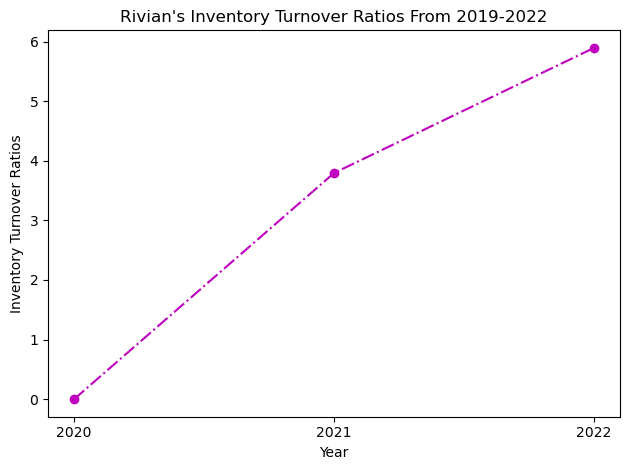

In [14]:
# Plotting Rivian's Inventory Turnover Ratios From 2019-2022 & Saving Plot
plt.plot(x_plots_years, y_plots_inventory_turnover_ratios, "o-.m")
plt.title("Rivian's Inventory Turnover Ratios From 2019-2022")
plt.xlabel("Year")
plt.ylabel("Inventory Turnover Ratios")
plt.savefig("../Financial Data Plots/InventoryTurnoverRatios.png")
plt.tight_layout()
plt.show()

# Profitability Ratios

In [15]:
### Profitability Ratios

# Gross Margin Ratio = Gross Profit / Revenue
if rivian_income_statement_df.iloc[3, 0] != 0:
    gross_margin_ratio_2019 = rivian_income_statement_df.iloc[3, 2] / rivian_income_statement_df.iloc[3, 0]
else:
    gross_margin_ratio_2019 = 0
    
if rivian_income_statement_df.iloc[2, 0] != 0:
    gross_margin_ratio_2020 = rivian_income_statement_df.iloc[2, 2] / rivian_income_statement_df.iloc[2, 0]
else:
    gross_margin_ratio_2020 = 0
    
if rivian_income_statement_df.iloc[1, 0] != 0:
    gross_margin_ratio_2021 = rivian_income_statement_df.iloc[1, 2] / rivian_income_statement_df.iloc[1, 0]
else:
    gross_margin_ratio_2021 = 0
    
if rivian_income_statement_df.iloc[0, 0] != 0:
    gross_margin_ratio_2022 = rivian_income_statement_df.iloc[0, 2] / rivian_income_statement_df.iloc[0, 0]
else:
    gross_margin_ratio_2022 = 0

# Return On Assets Ratio = Net Income / Total Assets
return_on_assets_ratio_2019 = rivian_cash_flow_statement_df.iloc[3, 0] / rivian_balance_sheet_df.iloc[3, 13]
return_on_assets_ratio_2020 = rivian_cash_flow_statement_df.iloc[2, 0] / rivian_balance_sheet_df.iloc[2, 13]
return_on_assets_ratio_2021 = rivian_cash_flow_statement_df.iloc[1, 0] / rivian_balance_sheet_df.iloc[1, 13]
return_on_assets_ratio_2022 = rivian_cash_flow_statement_df.iloc[0, 0] / rivian_balance_sheet_df.iloc[0, 13]

# Setting Up Plot For Gross Margin Ratios & Return On Assets Ratios With Respective Year
x_plots_years = ["2019", "2020", "2021", "2022"]

y_plots_gross_margin_ratios = [gross_margin_ratio_2019, 
                               gross_margin_ratio_2020, 
                               gross_margin_ratio_2021, 
                               gross_margin_ratio_2022]

y_plots_return_on_assets_ratios = [return_on_assets_ratio_2019, 
                                   return_on_assets_ratio_2020, 
                                   return_on_assets_ratio_2021, 
                                   return_on_assets_ratio_2022]

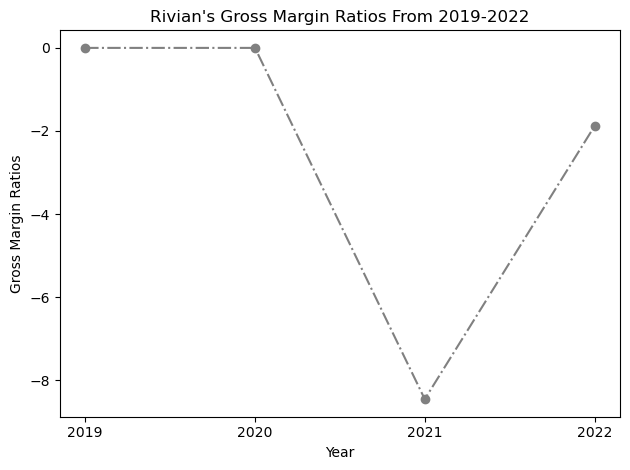

In [16]:
# Plotting Rivian's Gross Margin Ratios From 2019-2022 & Saving Plot
plt.plot(x_plots_years, y_plots_gross_margin_ratios, "o-.", color = "gray")
plt.title("Rivian's Gross Margin Ratios From 2019-2022")
plt.xlabel("Year")
plt.ylabel("Gross Margin Ratios")
plt.savefig("../Financial Data Plots/GrossMarginRatios.png")
plt.tight_layout()
plt.show()

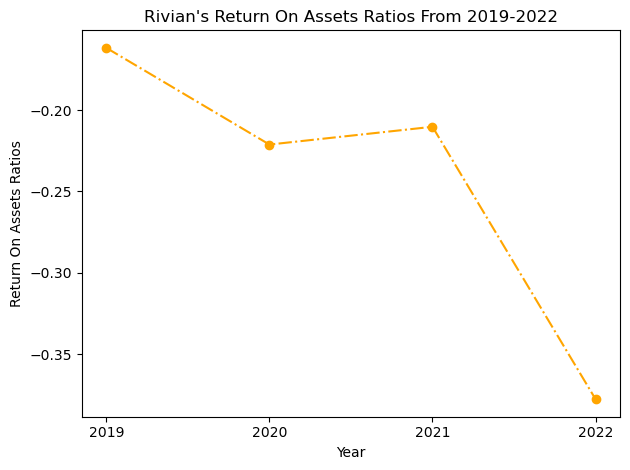

In [17]:
# Plotting Rivian's Return On Assets Ratios From 2019-2022 & Saving Plot
plt.plot(x_plots_years, y_plots_return_on_assets_ratios, "o-.", color = "orange")
plt.title("Rivian's Return On Assets Ratios From 2019-2022")
plt.xlabel("Year")
plt.ylabel("Return On Assets Ratios")
plt.savefig("../Financial Data Plots/ReturnOnAssetsRatios.png")
plt.tight_layout()
plt.show()

# Market Value Ratios

In [18]:
### Market Value Ratios

# Earnings Per Share Ratio = Net Income / Total Shares Outstanding
earnings_per_share_ratio_2019 = round(rivian_cash_flow_statement_df.iloc[3, 0] / rivian_income_statement_df.iloc[3, 19], 2)
earnings_per_share_ratio_2020 = round(rivian_cash_flow_statement_df.iloc[2, 0] / rivian_income_statement_df.iloc[2, 19], 2)
earnings_per_share_ratio_2021 = round(rivian_cash_flow_statement_df.iloc[1, 0] / rivian_income_statement_df.iloc[1, 19], 2)
earnings_per_share_ratio_2022 = round(rivian_cash_flow_statement_df.iloc[0, 0] / rivian_income_statement_df.iloc[0, 19], 2)

# Price-Earnings Ratio = Share Price / Earnings Per Share
share_price_end_2019 = 0
share_price_end_2020 = 0
share_price_end_2021 = 103.69
share_price_end_2022 = 18.43

price_earnings_ratio_2019 = share_price_end_2019 / earnings_per_share_ratio_2019
price_earnings_ratio_2020 = share_price_end_2020 / earnings_per_share_ratio_2020
price_earnings_ratio_2021 = share_price_end_2021 / earnings_per_share_ratio_2021
price_earnings_ratio_2022 = share_price_end_2022 / earnings_per_share_ratio_2022

# Setting Up Plot For Earnings Per Share Ratios & Price Earnings Ratios With Respective Year
x_plots_years = ["2019", "2020", "2021", "2022"]

y_plots_earnings_per_share_ratios = [earnings_per_share_ratio_2019, 
                                     earnings_per_share_ratio_2020, 
                                     earnings_per_share_ratio_2021, 
                                     earnings_per_share_ratio_2022]

y_plots_price_earnings_ratios = [price_earnings_ratio_2019, 
                                 price_earnings_ratio_2020, 
                                 price_earnings_ratio_2021, 
                                 price_earnings_ratio_2022]

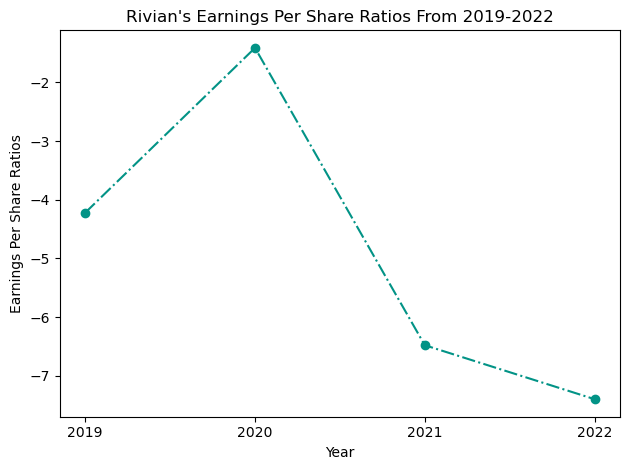

In [19]:
# Plotting Rivian's Earnings Per Share Ratios From 2019-2022 & Saving Plot
plt.plot(x_plots_years, y_plots_earnings_per_share_ratios, "o-.", color = "xkcd:teal")
plt.title("Rivian's Earnings Per Share Ratios From 2019-2022")
plt.xlabel("Year")
plt.ylabel("Earnings Per Share Ratios")
plt.savefig("../Financial Data Plots/EarningsPerShareRatios.png")
plt.tight_layout()
plt.show()

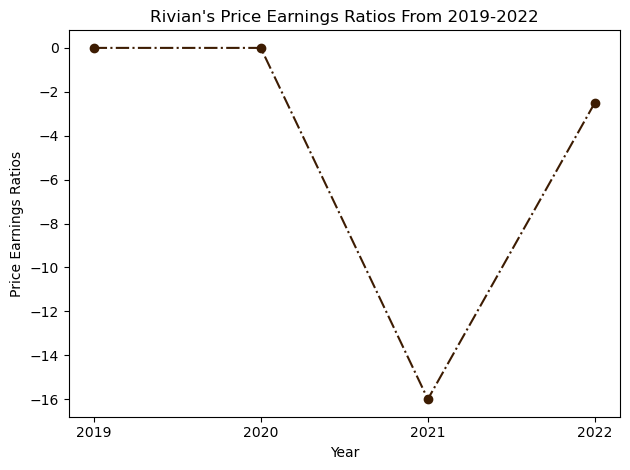

In [20]:
# Plotting Rivian's Price Earnings Ratios From 2019-2022 & Saving Plot
plt.plot(x_plots_years, y_plots_price_earnings_ratios, "o-.", color = "xkcd:chocolate")
plt.title("Rivian's Price Earnings Ratios From 2019-2022")
plt.xlabel("Year")
plt.ylabel("Price Earnings Ratios")
plt.savefig("../Financial Data Plots/PriceEarningsRatios.png")
plt.tight_layout()
plt.show()